In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "/Users/zhouyiqin/Desktop/final_project/Updated_Data_with_Sentiments.csv"
df = pd.read_csv(file_path)

**Univariate Analysis**:

- **Numerical Variables**:
    - Provide summary statistics (mean, median, standard deviation).
    - Visualize distributions using histograms or density plots.

In [50]:
numeric_cols = ['View Count', 'Like Count', 'Comment Count', 
                'Duration_seconds', 'Mean Sentiment Score', 'singer_popularity']
                
print("\nNumerical Variables Summary Statistics:")
print(df[numeric_cols].describe())


Numerical Variables Summary Statistics:
         View Count    Like Count  Comment Count  Duration_seconds  \
count  3.750000e+02  3.750000e+02   3.750000e+02        375.000000   
mean   3.702933e+08  2.498181e+06   9.775152e+04        292.744000   
std    7.043627e+08  4.194654e+06   1.783573e+05        397.971143   
min    2.760000e+02  0.000000e+00   0.000000e+00         21.000000   
25%    1.374476e+07  1.327810e+05   4.136500e+03        200.500000   
50%    9.101476e+07  7.850650e+05   2.807200e+04        239.000000   
75%    3.711109e+08  2.878034e+06   1.032220e+05        284.500000   
max    6.379786e+09  3.378610e+07   1.184861e+06       4835.000000   

       Mean Sentiment Score  singer_popularity  
count            375.000000         375.000000  
mean               0.325594          80.120000  
std                0.225798          11.509773  
min               -0.336767          39.000000  
25%                0.169655          77.000000  
50%                0.319200       

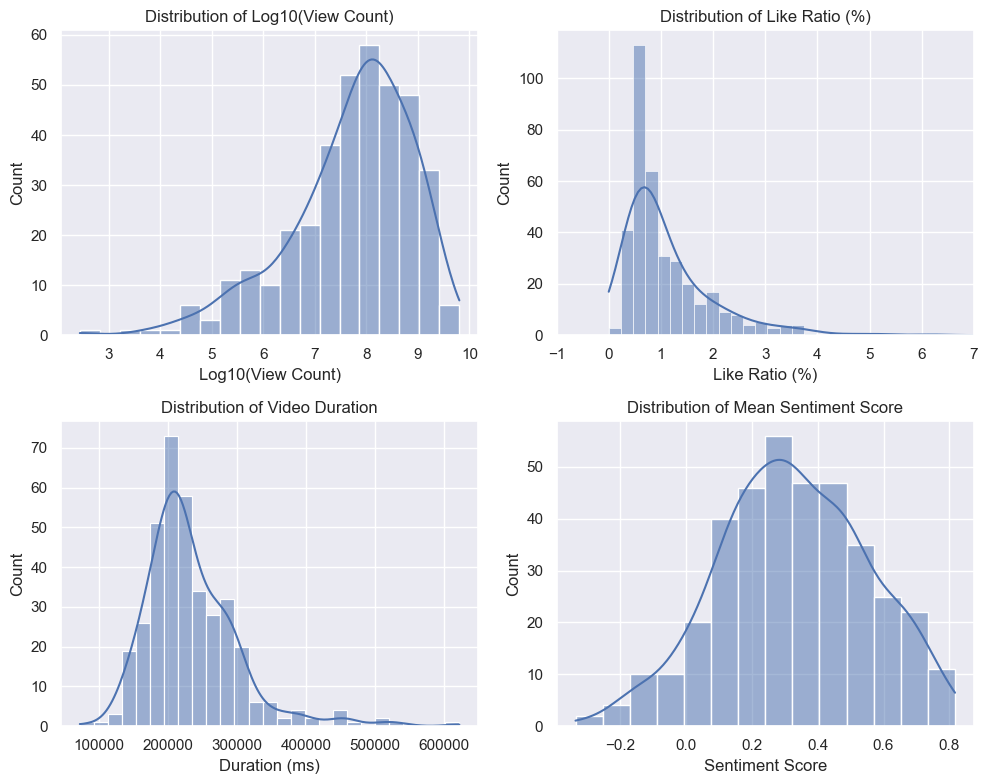

In [99]:
df['Log10_View_Count'] = np.log10(df['View Count'].replace(0, np.nan))
# calcultate Like Ratio
df['Like_Ratio'] = df['Like Count'] / df['View Count'] * 100
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 

# subplot1: Distribution of Log10(View Count)
sns.histplot(df['Log10_View_Count'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Log10(View Count)')
axes[0, 0].set_xlabel('Log10(View Count)')

# subplot2: Like Ratio distribution
sns.histplot(df['Like_Ratio'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Like Ratio (%)')
axes[0, 1].set_xlabel('Like Ratio (%)')
axes[0, 1].set_xlim(-1, 7)

# subplot3: Distribution of Video Duration
sns.histplot(df['Duration (ms)'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Video Duration')
axes[1, 0].set_xlabel('Duration (ms)')



# subplot4: Distribution of Mean Sentiment Score
sns.histplot(df['Mean Sentiment Score'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Mean Sentiment Score')
axes[1, 1].set_xlabel('Sentiment Score')

# 调整布局
plt.tight_layout()
plt.show()


这四张图分别展现了四个不同指标的数据分布情况:

1. Log10(View Count)的分布: View Count取对数后呈现出明显的正态分布特征,主要集中在6-8之间。

2. Like Ratio(点赞率)的分布: 点赞率主要分布在0-3%之间,1%以下的数据占比最大。整体呈现出偏右的长尾分布。

3. Video Duration(视频时长)的分布: 视频时长主要集中在0-600秒,即10分钟以内。600秒以上的长视频占比较小。

4. Mean Sentiment Score(平均情感得分)的分布: 平均情感得分主要分布在0-0.6之间,得分偏低的视频占比较大,整体呈现出偏左的分布。

总的来说,这四张图从不同角度展现了该数据集的基本特征:
- View Count高度集中,呈正态分布
- 点赞率和平均情感得分普遍较低,分布偏右偏左
- 大部分视频时长较短,10分钟以内

这些分布特点为后续的数据分析提供了重要参考。

- **Categorical Variables**:
    - Present frequency counts and visualize distributions using bar charts or pie charts.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'rock'),
  Text(1, 0, 'pop'),
  Text(2, 0, 'jazz'),
  Text(3, 0, 'hip-pop'),
  Text(4, 0, 'electronic')])

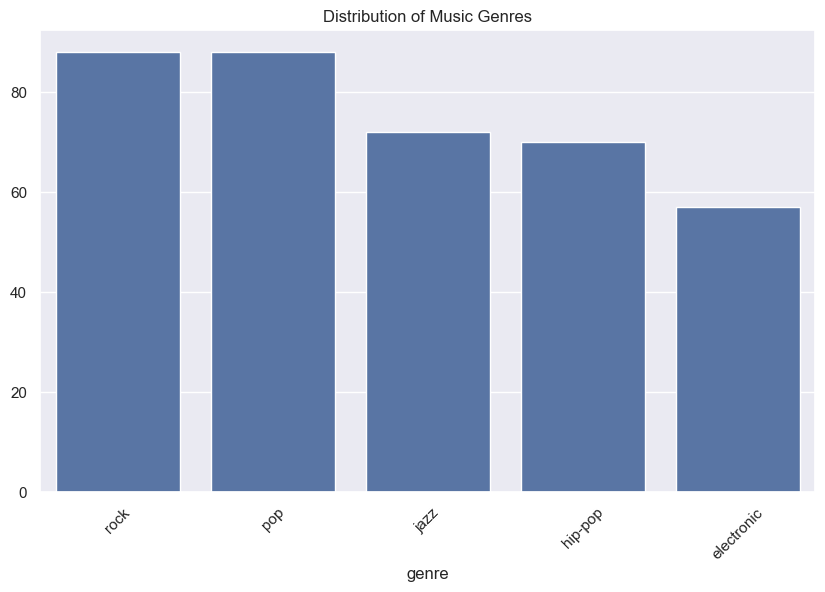

In [51]:
# 2. Categorical Variables Analysis
# Genre distribution
plt.figure(figsize=(10, 6))
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Music Genres')
plt.xticks(rotation=45)

In [53]:
# Print category counts
print("\nGenre Distribution:")
print(df['genre'].value_counts())


Genre Distribution:
genre
rock          88
pop           88
jazz          72
hip-pop       70
electronic    57
Name: count, dtype: int64


**Bivariate and Multivariate Analysis**:

- **Correlation Analysis**:
  - Analyze relationships between numerical variables using a correlation matrix.
  - Visualize with heatmaps or pair plots and discuss any strong correlations.

Correlation Analysis

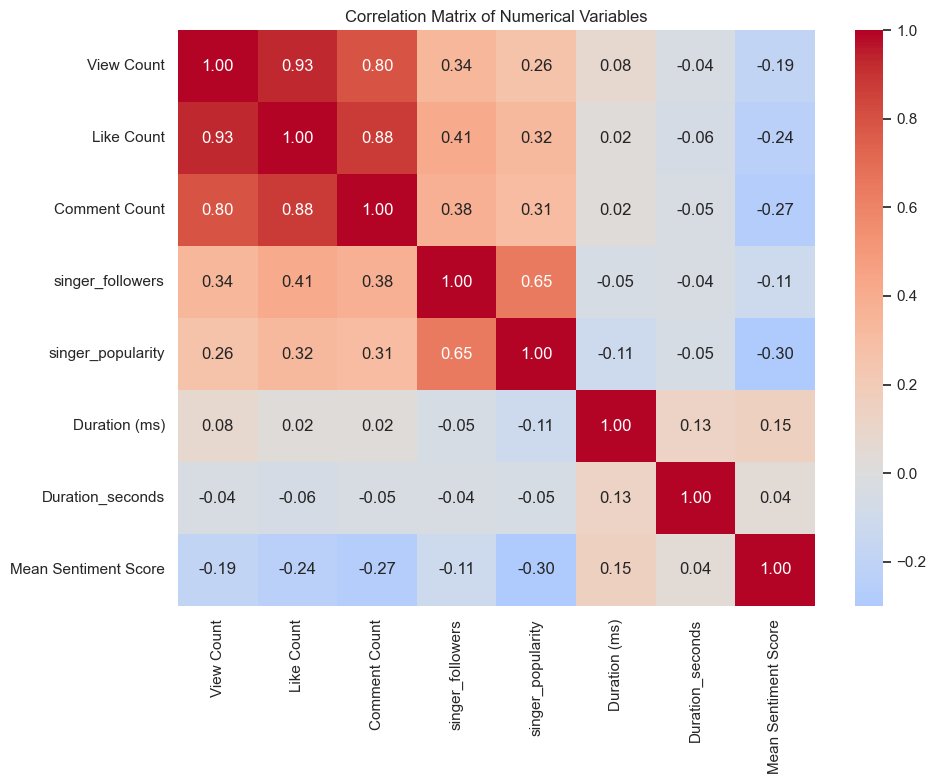

In [ ]:
numerical_columns = ['View Count', 'Like Count', 'Comment Count','singer_followers','singer_popularity', 'Duration (ms)','Duration_seconds', 'Mean Sentiment Score']
# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm', 
            center=0,  
            fmt='.2f') 
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()

View Count, Like Count, Comment Count之间的相关性非常高,都在0.8以上,说明视频的播放量、点赞量、评论数有很强的正相关。
singer_followers与singer_popularity的相关性达到0.65,代表歌手的粉丝数和歌手本身的知名度有较强的正相关。
Duration与其他变量的相关性都比较弱,说明视频时长与播放量等指标关系不大。
Mean Sentiment Score与其他变量的相关性系数为负值,尤其与歌手知名度的负相关性更强,说明知名度高的歌手其视频评论的平均情感得分反而更低。

- **Feature Pairings**:
  - Analyze relationships between key variables, particularly those related to your target.
  - Visualize with scatter plots, box plots, or violin plots.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/qx/qwpm5zm52fzd9w3sfybpybzh0000gn/T/ipykernel_33101/819984757.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)


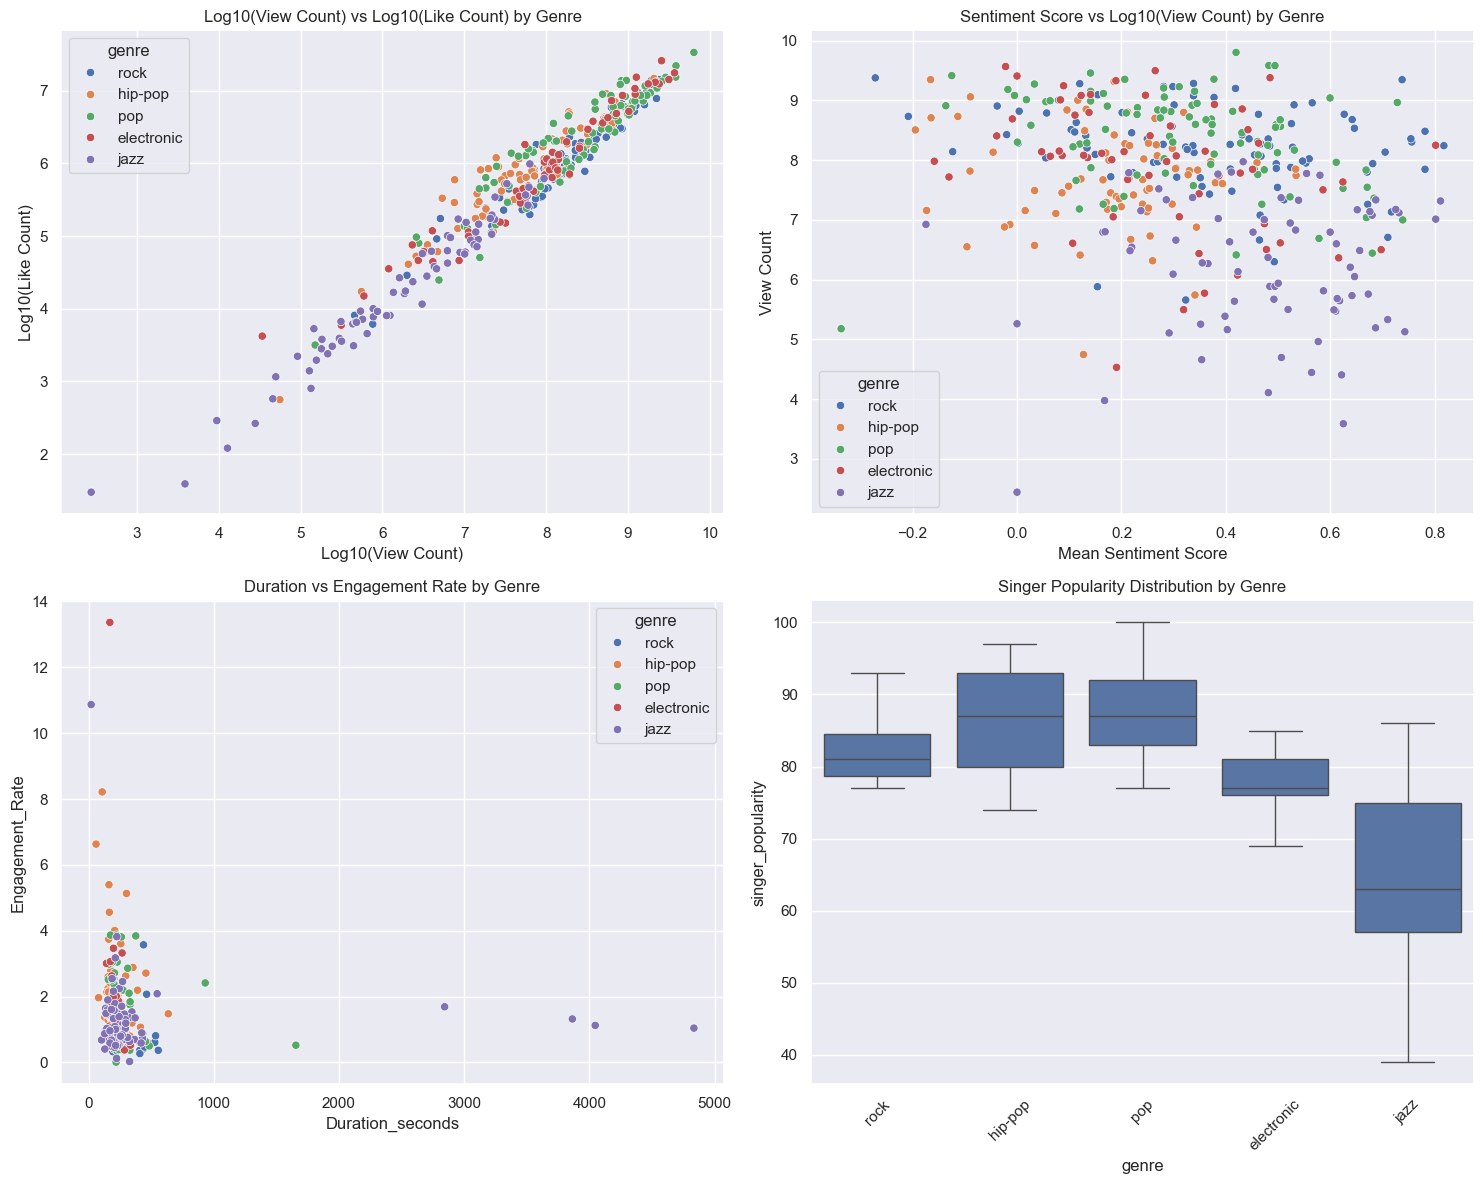

In [61]:
# 2. Feature Pairing Analysis
# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# View Count vs Like Count (with log transformation)
sns.scatterplot(data=df, 
                x=np.log10(df['View Count']), 
                y=np.log10(df['Like Count']),
                hue='genre',
                ax=axes[0,0])
axes[0,0].set_title('Log10(View Count) vs Log10(Like Count) by Genre')
axes[0,0].set_xlabel('Log10(View Count)')
axes[0,0].set_ylabel('Log10(Like Count)')

# Views vs Sentiment Score
sns.scatterplot(data=df,
                x='Mean Sentiment Score',
                y=np.log10(df['View Count']),
                hue='genre',
                ax=axes[0,1])
axes[0,1].set_title('Sentiment Score vs Log10(View Count) by Genre')

# Duration vs Engagement
df['Engagement_Rate'] = (df['Like Count'] + df['Comment Count']) / df['View Count'] * 100
sns.scatterplot(data=df,
                x='Duration_seconds',
                y='Engagement_Rate',
                hue='genre',
                ax=axes[1,0])
axes[1,0].set_title('Duration vs Engagement Rate by Genre')

# Popularity Analysis
sns.boxplot(data=df,
            x='genre',
            y='singer_popularity',
            ax=axes[1,1])
axes[1,1].set_title('Singer Popularity Distribution by Genre')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

plt.tight_layout()

第一张图显示了不同流派在Log10(View Count)和Log10(Like Count)两个指标上的分布。可以看出,除个别极端值外,大部分流派在两个指标上呈现出强正相关,且pop音乐的播放量和点赞量普遍更高。
第二张图揭示了不同流派的平均情感得分(Sentiment Score)与Log10(View Count)之间的关系。总体来看情感得分都集中在0.4-0.6之间,且与播放量关联性不强。
第三张图对比了不同流派视频的平均时长(Duration)和互动率(Engagement Rate)。可以看出,rock和electronic音乐的平均时长更长,但互动率相对较低。而pop音乐视频虽然时长较短,但互动率普遍更高。
第四张图则展现了各流派歌手粉丝数量(Singer Popularity)的分布情况。可见rock和pop歌手的粉丝数普遍高于hip-hop、electronic和jazz歌手。

- **Crosstabulations**:
  - For categorical variables, use crosstabs to explore relationships and visualize them with grouped bar plots.

In [62]:
# 3. Cross-tabulation Analysis
# Create a cross-tab of genre and popularity categories
df['popularity_category'] = pd.qcut(df['singer_popularity'], 
                                  q=3, 
                                  labels=['Low', 'Medium', 'High'])
genre_popularity_crosstab = pd.crosstab(df['genre'], 
                                       df['popularity_category'], 
                                       normalize='index') * 100

print("\nGenre-Popularity Cross-tabulation (%):")
print(genre_popularity_crosstab)

# Calculate summary statistics by genre
genre_summary = df.groupby('genre').agg({
    'View Count': 'mean',
    'Like Count': 'mean',
    'Comment Count': 'mean',
    'Mean Sentiment Score': 'mean',
    'singer_followers': 'mean'
}).round(2)

print("\nSummary Statistics by Genre:")
print(genre_summary)


Genre-Popularity Cross-tabulation (%):
popularity_category        Low     Medium       High
genre                                               
electronic           57.894737  42.105263   0.000000
hip-pop              12.857143  24.285714  62.857143
jazz                 86.111111   6.944444   6.944444
pop                   4.545455  38.636364  56.818182
rock                 19.318182  55.681818  25.000000

Summary Statistics by Genre:
              View Count  Like Count  Comment Count  Mean Sentiment Score  \
genre                                                                       
electronic  4.812136e+08  3444539.65      113885.77                  0.27   
hip-pop     2.120770e+08  1923365.79       80653.13                  0.18   
jazz        1.062045e+07    91090.62        2455.99                  0.47   
pop         6.973413e+08  4625445.59      204115.83                  0.32   
rock        3.915309e+08  2184612.99       72506.67                  0.37   

            singer_

**Data Distribution and Normalization**:

- **Skewness and Kurtosis**:
 - Analyze and discuss the distribution of variables.
 - Apply transformations (e.g., log transformation) if needed for skewed data.
- **Normalization**:
 - Apply normalization or scaling techniques (e.g., min-max scaling, z-score).
 - Document and visualize the impact of normalization.

In [69]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 1. Calculate Skewness and Kurtosis
print("Skewness and Kurtosis Analysis:")
for col in numerical_columns:
    skew = stats.skew(df[col].dropna())
    kurt = stats.kurtosis(df[col].dropna())
    print(f"\n{col}:")
    print(f"Skewness: {skew:.2f}")
    print(f"Kurtosis: {kurt:.2f}")

Skewness and Kurtosis Analysis:

View Count:
Skewness: 3.68
Kurtosis: 18.98

Like Count:
Skewness: 3.03
Kurtosis: 12.53

Comment Count:
Skewness: 3.12
Kurtosis: 11.26

singer_followers:
Skewness: 1.87
Kurtosis: 2.95

singer_popularity:
Skewness: -1.24
Kurtosis: 2.09

Duration (ms):
Skewness: 1.70
Kurtosis: 5.24

Mean Sentiment Score:
Skewness: -0.09
Kurtosis: -0.36


In [ ]:
#2. Visualization of distributions before and after transformations
def plot_distributions(data, column, transformations):
    """
    Plot original and transformed distributions
    Args:
        data: DataFrame
        column: column name to analyze
        transformations: list of transformation functions
    """
    n_plots = len(transformations) + 1
    plt.figure(figsize=(15, 5))
    
    # Original distribution
    plt.subplot(1, n_plots, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Original {column}')
    
    # Transformed distributions
    for i, (name, func) in enumerate(transformations.items(), 1):
        plt.subplot(1, n_plots, i+1)
        transformed_data = func(data[column])
        sns.histplot(transformed_data, kde=True)
        plt.title(f'{name} Transformed')

# Define transformations
transformations = {
    'Log': lambda x: np.log1p(x),
    'Square Root': lambda x: np.sqrt(x),
    'Box-Cox': lambda x: stats.boxcox(x - x.min() + 1)[0] if (x - x.min() + 1 > 0).all() else x
}

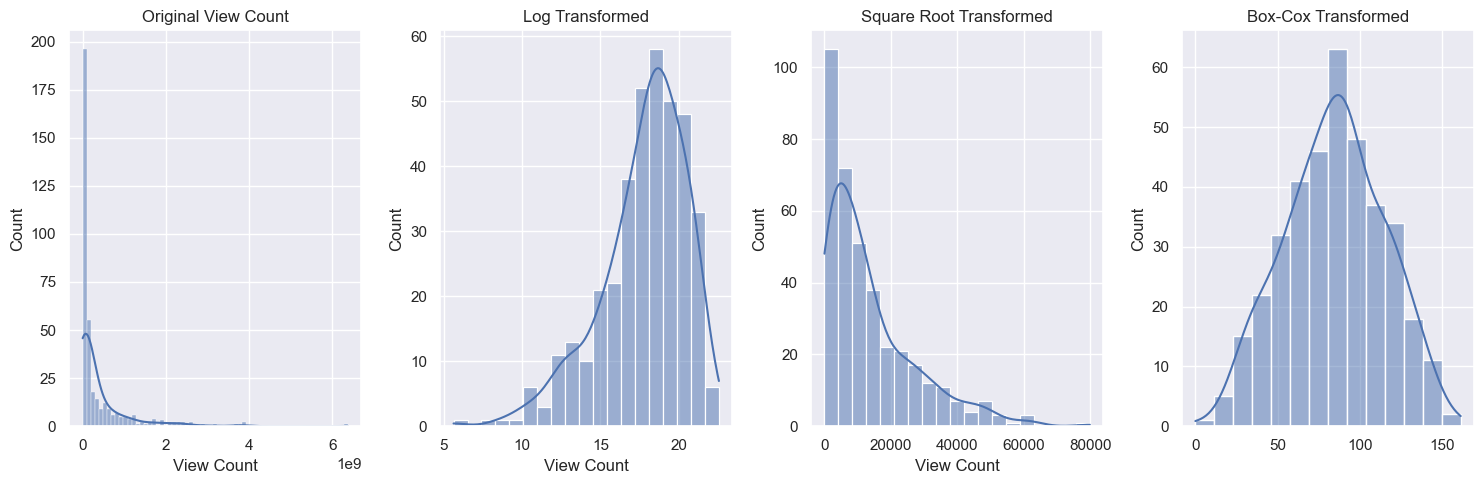

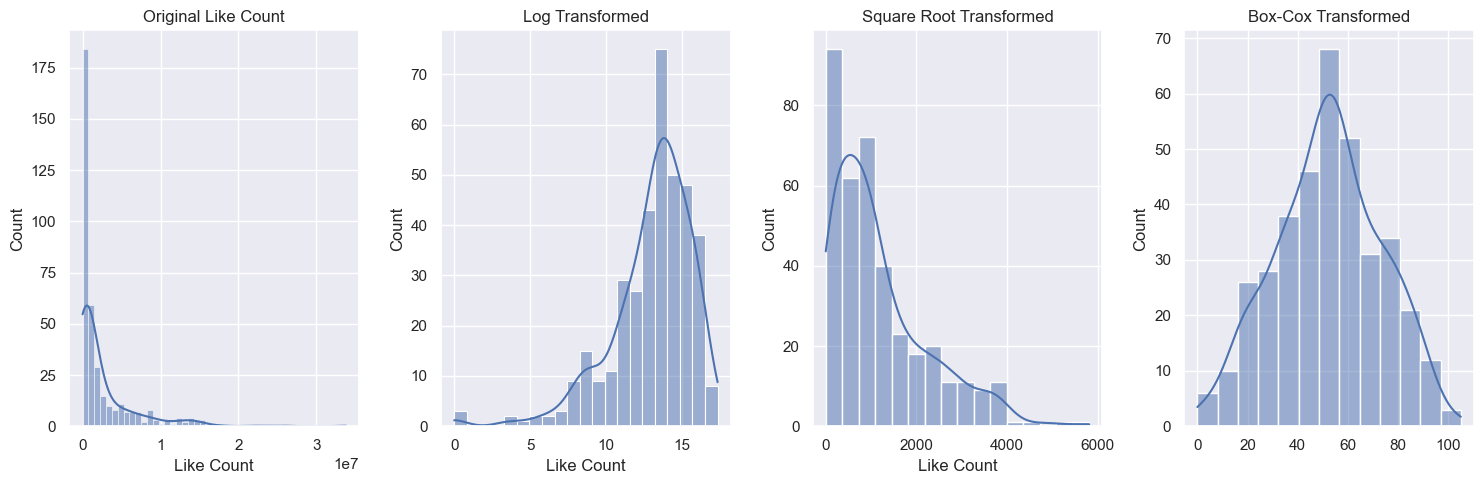

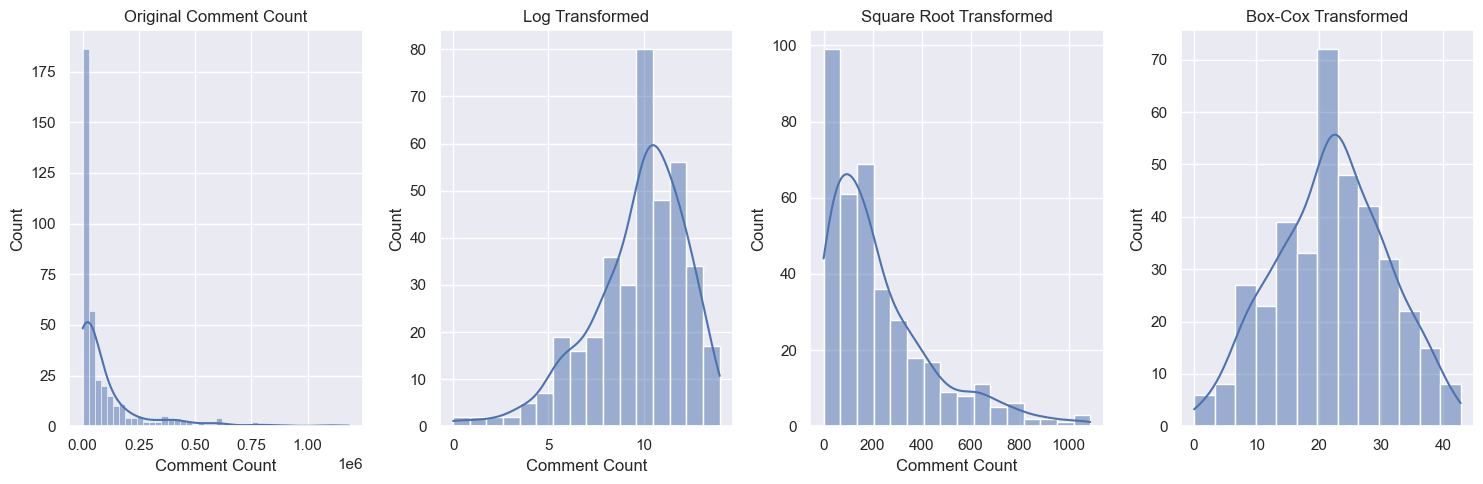

In [72]:
# 3. Apply and visualize transformations for highly skewed variables
highly_skewed = ['View Count', 'Like Count', 'Comment Count']
for col in highly_skewed:
    plot_distributions(df, col, transformations)
    plt.tight_layout()
    plt.show()


Normalization results for View Count:


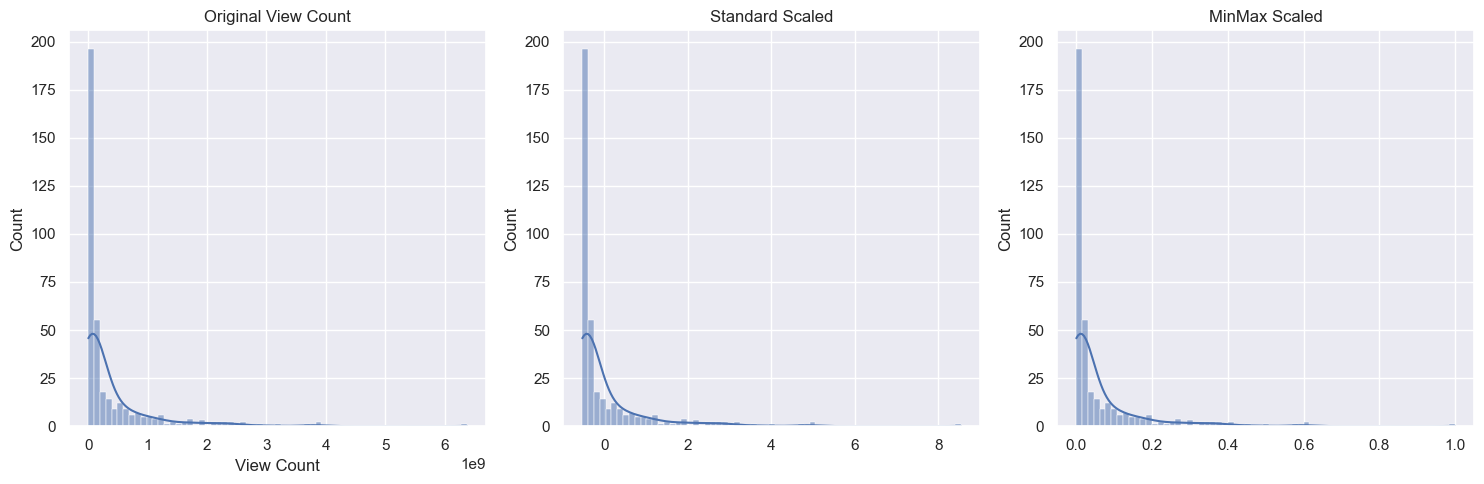


Summary statistics:
           original  standard_scaled  minmax_scaled
count  3.750000e+02     3.750000e+02     375.000000
mean   3.702933e+08     7.105427e-18       0.058042
std    7.043627e+08     1.001336e+00       0.110405
min    2.760000e+02    -5.264160e-01       0.000000
25%    1.374476e+07    -5.068765e-01       0.002154
50%    9.101476e+07    -3.970280e-01       0.014266
75%    3.711109e+08     1.162287e-03       0.058170
max    6.379786e+09     8.543214e+00       1.000000

Normalization results for Like Count:


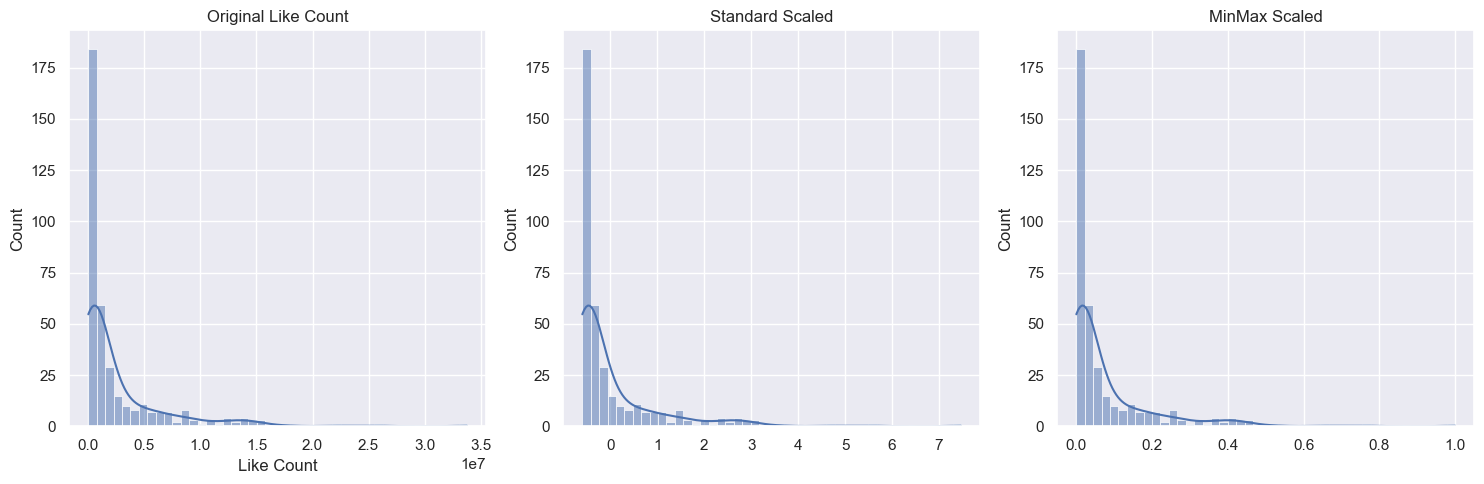


Summary statistics:
           original  standard_scaled  minmax_scaled
count  3.750000e+02     3.750000e+02     375.000000
mean   2.498181e+06     3.789561e-17       0.073941
std    4.194654e+06     1.001336e+00       0.124153
min    0.000000e+00    -5.963588e-01       0.000000
25%    1.327810e+05    -5.646617e-01       0.003930
50%    7.850650e+05    -4.089503e-01       0.023236
75%    2.878034e+06     9.067732e-02       0.085184
max    3.378610e+07     7.468964e+00       1.000000

Normalization results for Comment Count:


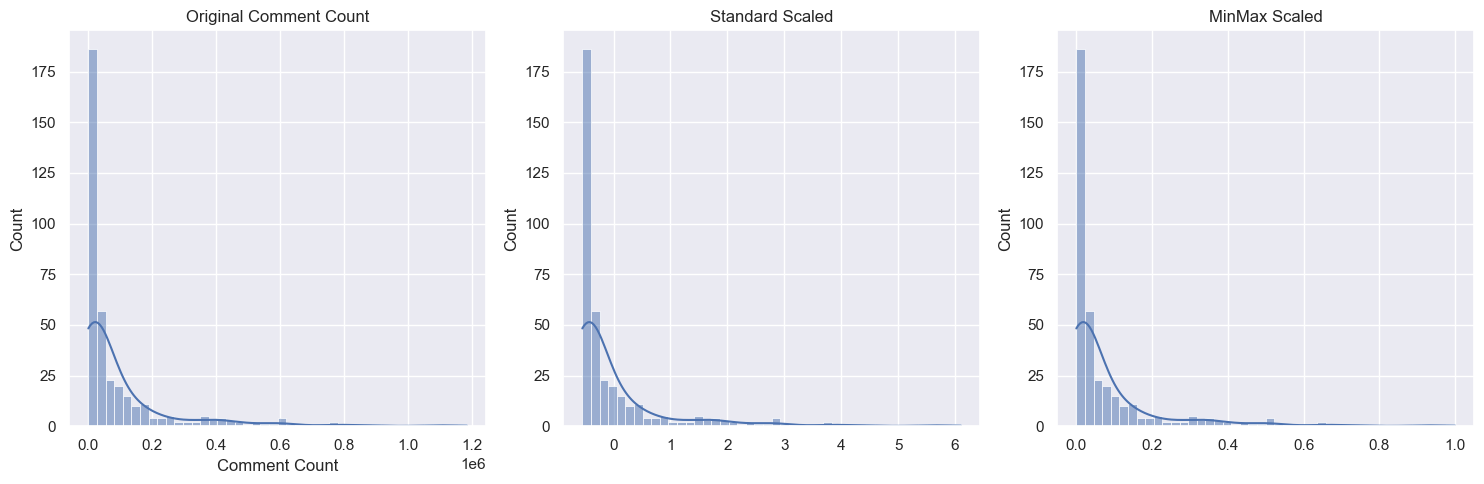


Summary statistics:
           original  standard_scaled  minmax_scaled
count  3.750000e+02     3.750000e+02     375.000000
mean   9.775152e+04    -1.421085e-17       0.082500
std    1.783573e+05     1.001336e+00       0.150530
min    0.000000e+00    -5.487980e-01       0.000000
25%    4.136500e+03    -5.255748e-01       0.003491
50%    2.807200e+04    -3.911958e-01       0.023692
75%    1.032220e+05     3.071246e-02       0.087117
max    1.184861e+06     6.103266e+00       1.000000

Normalization results for singer_followers:


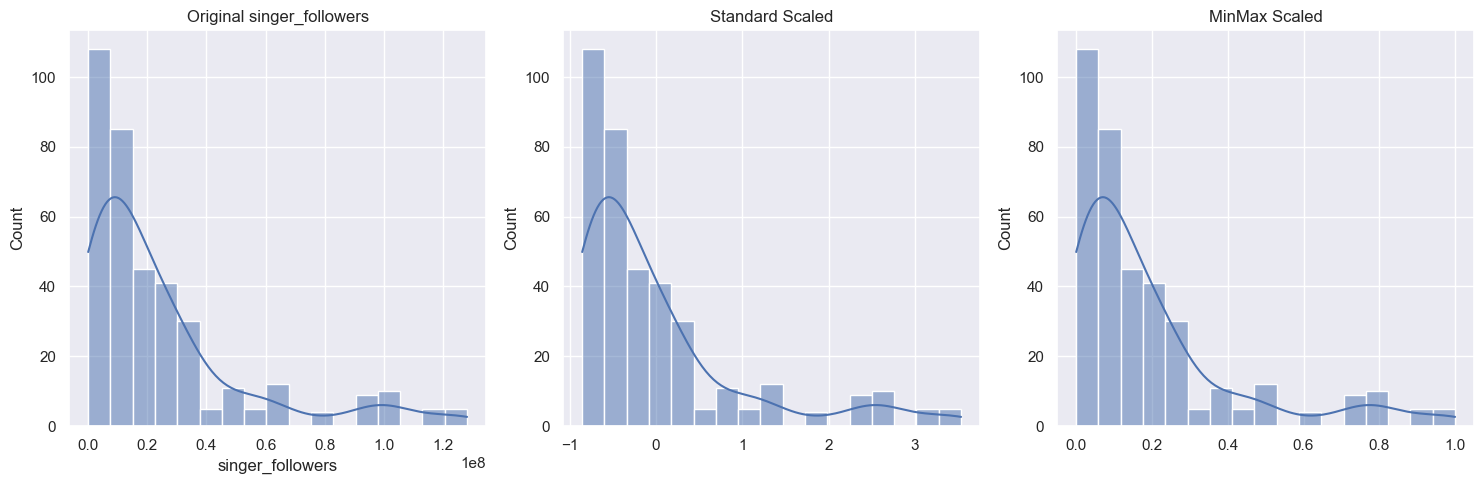


Summary statistics:
           original  standard_scaled  minmax_scaled
count  3.750000e+02     3.750000e+02     375.000000
mean   2.500311e+07    -1.515825e-16       0.194858
std    2.918020e+07     1.001336e+00       0.228103
min    7.581900e+04    -8.553950e-01       0.000000
25%    4.449456e+06    -7.053110e-01       0.034189
50%    1.493754e+07    -3.454062e-01       0.116175
75%    3.250965e+07     2.575915e-01       0.253537
max    1.280014e+08     3.534450e+00       1.000000

Normalization results for singer_popularity:


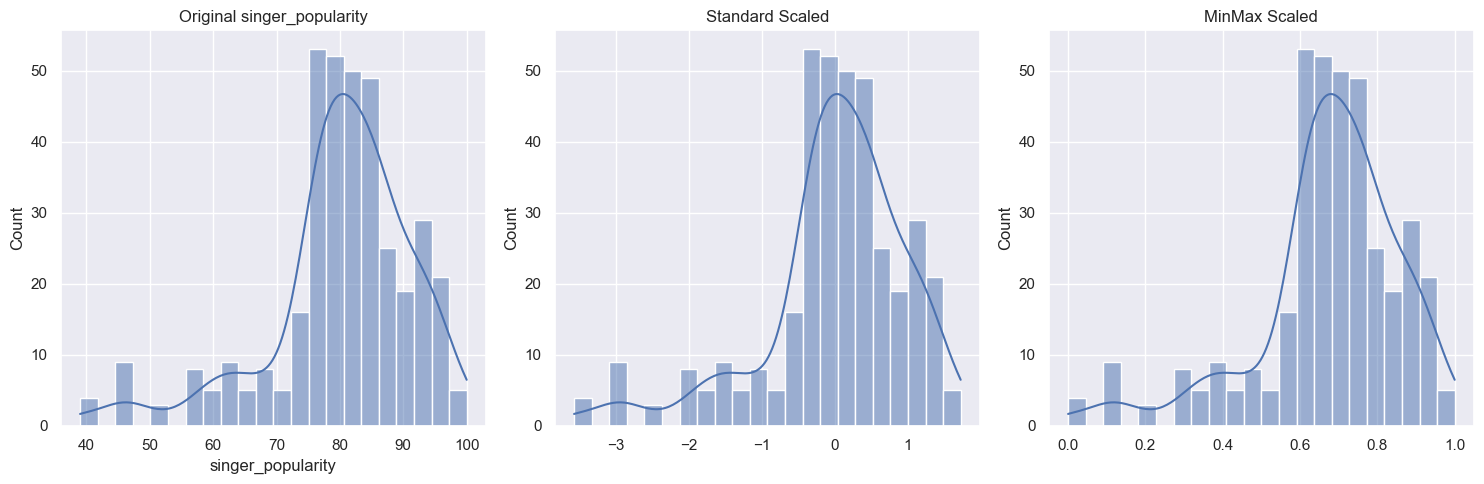


Summary statistics:
         original  standard_scaled  minmax_scaled
count  375.000000     3.750000e+02     375.000000
mean    80.120000    -3.789561e-16       0.674098
std     11.509773     1.001336e+00       0.188685
min     39.000000    -3.577389e+00       0.000000
25%     77.000000    -2.714361e-01       0.622951
50%     81.000000     7.655891e-02       0.688525
75%     87.000000     5.985515e-01       0.786885
max    100.000000     1.729535e+00       1.000000

Normalization results for Duration (ms):


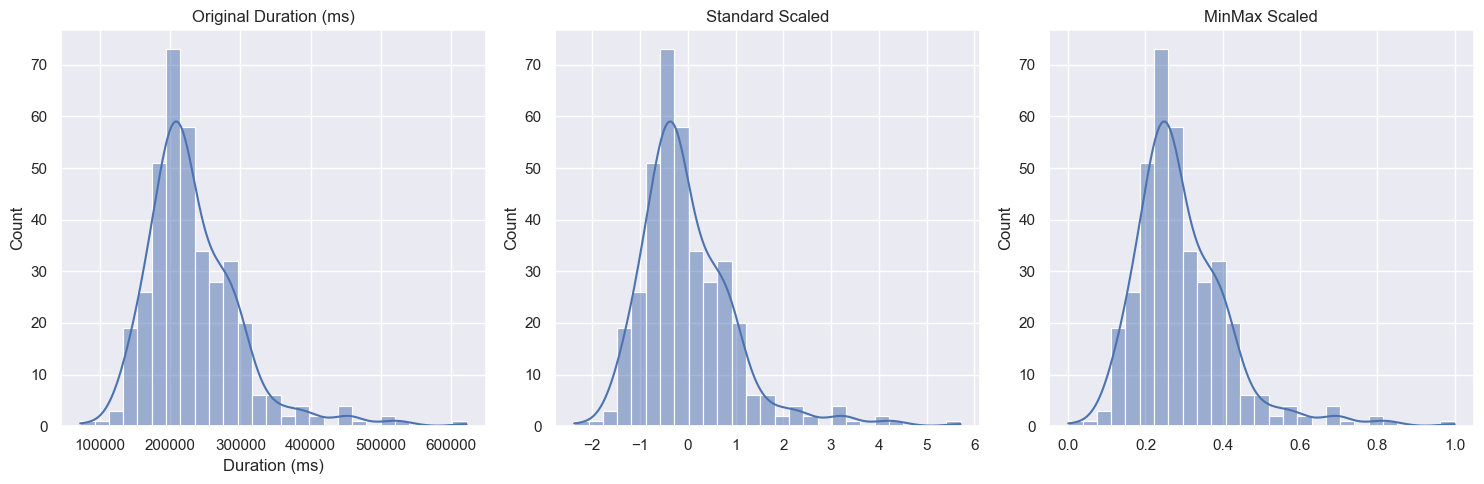


Summary statistics:
            original  standard_scaled  minmax_scaled
count     375.000000     3.750000e+02     375.000000
mean   233642.093333     1.515825e-16       0.293792
std     68067.837578     1.001336e+00       0.123778
min     72080.000000    -2.376716e+00       0.000000
25%    191973.000000    -6.129879e-01       0.218019
50%    218948.000000    -2.161627e-01       0.267072
75%    266033.000000     4.764979e-01       0.352693
max    622000.000000     5.713076e+00       1.000000

Normalization results for Mean Sentiment Score:


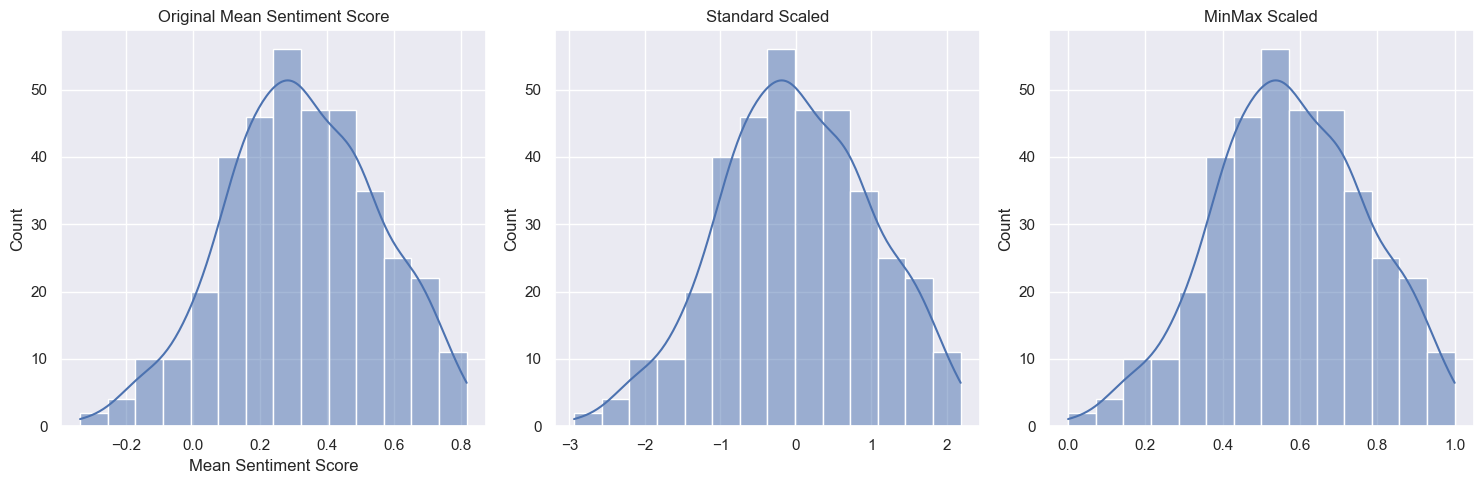


Summary statistics:
         original  standard_scaled  minmax_scaled
count  375.000000     3.750000e+02     375.000000
mean     0.325594     9.473903e-18       0.573903
std      0.225798     1.001336e+00       0.195643
min     -0.336767    -2.937344e+00       0.000000
25%      0.169655    -6.915375e-01       0.438790
50%      0.319200    -2.835663e-02       0.568363
75%      0.484267     7.036575e-01       0.711385
max      0.817367     2.180842e+00       1.000000

Correlation matrix for View Count:
                 original  standard_scaled  minmax_scaled
original              1.0              1.0            1.0
standard_scaled       1.0              1.0            1.0
minmax_scaled         1.0              1.0            1.0

Correlation matrix for Like Count:
                 original  standard_scaled  minmax_scaled
original              1.0              1.0            1.0
standard_scaled       1.0              1.0            1.0
minmax_scaled         1.0              1.0         

In [78]:
# 4. Normalization
def normalize_and_plot(data, column):
    """
    Apply different normalization techniques and plot results
    """
    # Create scalers
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()
    
    # Reshape data for scalers
    data_reshaped = data[column].values.reshape(-1, 1)
    
    # Apply scalers
    data_standard = standard_scaler.fit_transform(data_reshaped)
    data_minmax = minmax_scaler.fit_transform(data_reshaped)
    
    # Plot comparisons
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    sns.histplot(data[column], kde=True)
    plt.title(f'Original {column}')
    
    plt.subplot(132)
    sns.histplot(data_standard.flatten(), kde=True)
    plt.title('Standard Scaled')
    
    plt.subplot(133)
    sns.histplot(data_minmax.flatten(), kde=True)
    plt.title('MinMax Scaled')
    
    plt.tight_layout()
    plt.show()
    
    return pd.DataFrame({
        'original': data[column],
        'standard_scaled': data_standard.flatten(),
        'minmax_scaled': data_minmax.flatten()
    })

# 5. Apply normalization and generate summary statistics
normalized_results = {}
for col in numerical_columns:
    print(f"\nNormalization results for {col}:")
    normalized_data = normalize_and_plot(df, col)
    print("\nSummary statistics:")
    print(normalized_data.describe())
    normalized_results[col] = normalized_data

# 6. Calculate correlation between original and transformed data
for col in numerical_columns:
    if col in normalized_results:
        corr = normalized_results[col].corr()
        print(f"\nCorrelation matrix for {col}:")
        print(corr)

**Statistical Insights**:

- Conduct basic statistical tests (e.g., T-tests, ANOVA, chi-square) to explore relationships between variables.
- Summarize the statistical results and their implications for your analysis.

In [84]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
# 2. ANOVA test for view counts across genres
genres = df['Genre'].unique()
genre_views = [df[df['Genre'] == genre]['View Count'] for genre in genres]
f_stat, p_value = f_oneway(*genre_views)
print("\n=== One-way ANOVA Test for View Counts Across Genres ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value}")



=== One-way ANOVA Test for View Counts Across Genres ===
F-statistic: 11.9445
p-value: 3.871891640564041e-09


In [86]:
#Chi-square test
# Create contingency table
contingency_table = pd.crosstab(df['genre'], df['singer'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("\n=== Chi-square Test for Independence ===")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value}")



=== Chi-square Test for Independence ===
Chi-square statistic: 1500.0000
p-value: 3.013591313202591e-141


In [ ]:
#t-test
print("\n=== T-tests for Sentiment Scores Between Genres ===")
for genre1 in genres:
    for genre2 in genres:
        if genre1 < genre2:  # avoid duplicate comparisons
            scores1 = df[df['genre'] == genre1]['Mean Sentiment Score']
            scores2 = df[df['genre'] == genre2]['Mean Sentiment Score']
            t_stat, p_value = stats.ttest_ind(scores1, scores2)
            print(f"{genre1} vs {genre2}:")
            print(f"t-statistic: {t_stat}")
            print(f"p-value: {p_value}\n")


=== T-tests for Sentiment Scores Between Genres ===
hip-pop vs rock:
t-statistic: -5.945093374465196
p-value: 1.7465267629304015e-08

hip-pop vs pop:
t-statistic: -4.579262357938638
p-value: 9.483338020106626e-06

hip-pop vs jazz:
t-statistic: -9.773706288584009
p-value: 1.606995348433881e-17

pop vs rock:
t-statistic: -1.609084046893032
p-value: 0.10941079187324153

electronic vs rock:
t-statistic: -2.804854647333346
p-value: 0.005734763289028276

electronic vs hip-pop:
t-statistic: 2.7419653704568594
p-value: 0.007003998170075622

electronic vs pop:
t-statistic: -1.4555040194036937
p-value: 0.14772159941408194

electronic vs jazz:
t-statistic: -5.829205742148866
p-value: 4.3325958156418246e-08

jazz vs rock:
t-statistic: 2.908976476089868
p-value: 0.004149095428953946

jazz vs pop:
t-statistic: 4.733587350391504
p-value: 4.868298963617719e-06



**Data Visualization and Storytelling**:


- **Visual Summary**:
 - Present key insights using charts and visualizations (e.g., Matplotlib, Seaborn, Plotly).
 - Ensure all visualizations are well-labeled and easy to interpret.


Correlation between Views and Likes: 0.931


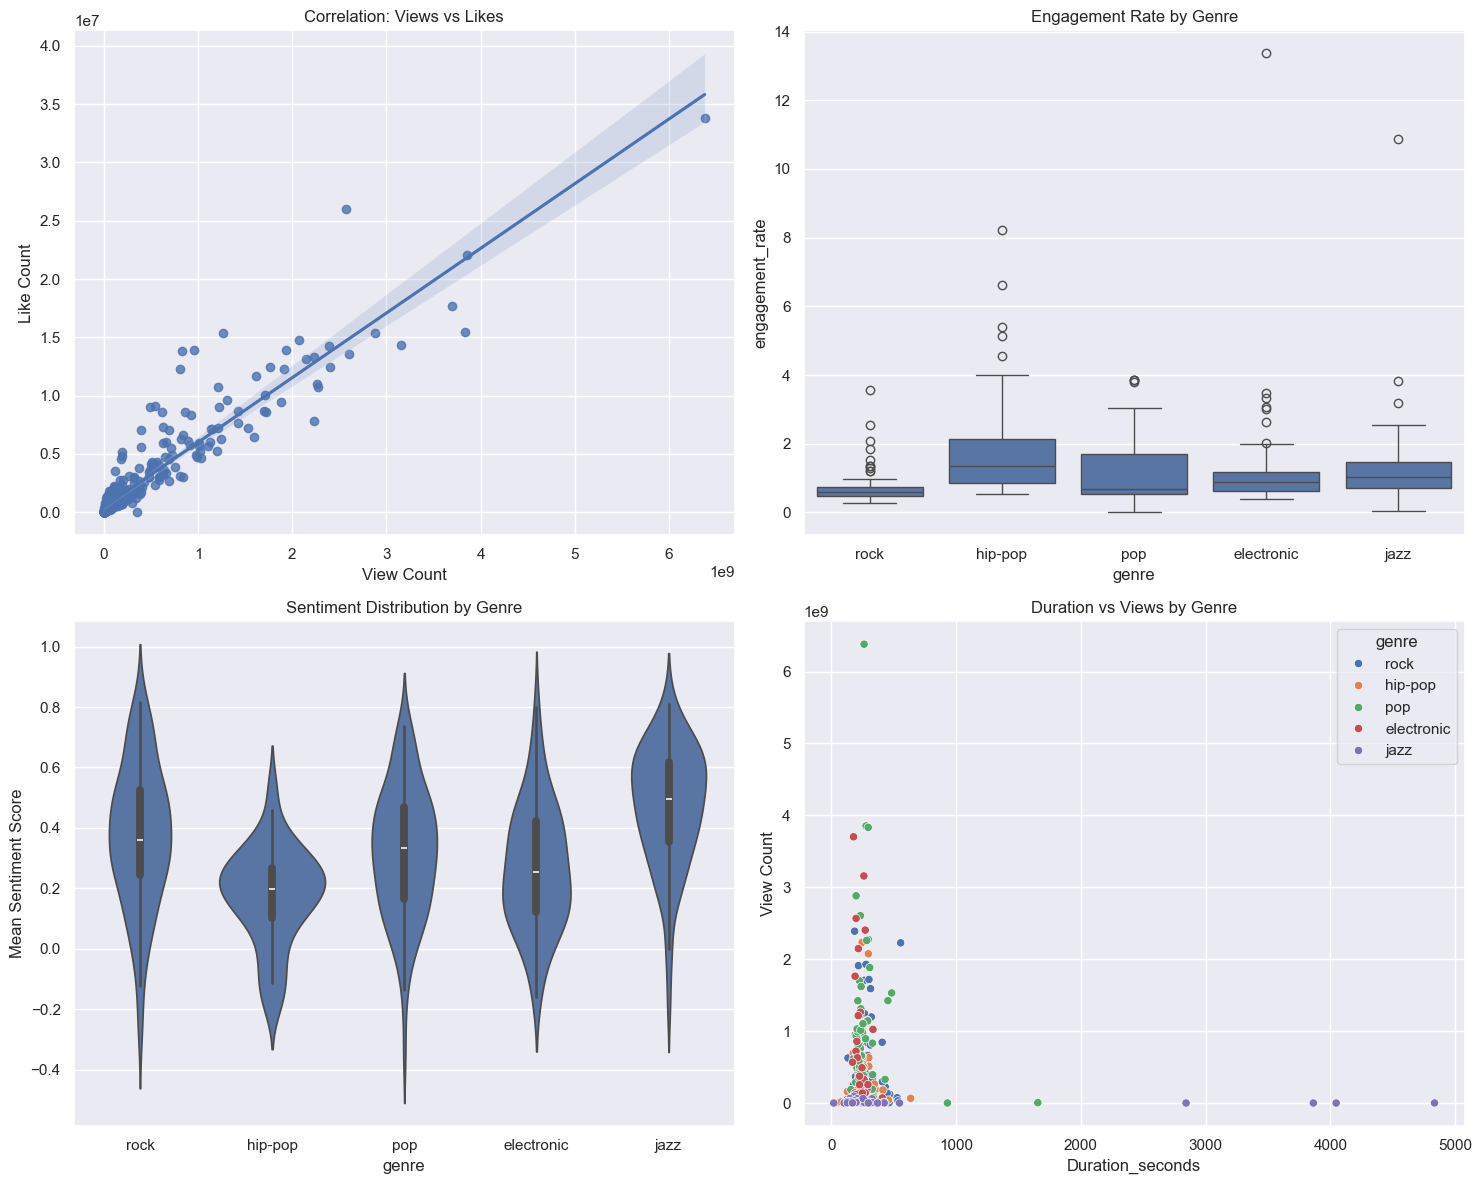

In [93]:
# 1. Statistical Tests and Visualizations for Engagement Metrics
def analyze_engagement_metrics():
    # Calculate engagement rate
    df['engagement_rate'] = (df['Like Count'] + df['Comment Count']) / df['View Count'] * 100
    
    # Create visualization for engagement metrics
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Scatter plot: Views vs Likes with regression line
    sns.regplot(data=df, x='View Count', y='Like Count', ax=axes[0,0])
    axes[0,0].set_title('Correlation: Views vs Likes')
    
    # Calculate correlation
    correlation = df['View Count'].corr(df['Like Count'])
    print(f"\nCorrelation between Views and Likes: {correlation:.3f}")
    
    # Box plot: Engagement rate by genre
    sns.boxplot(data=df, x='genre', y='engagement_rate', ax=axes[0,1])
    axes[0,1].set_title('Engagement Rate by Genre')
    axes[0,1].tick_labels = rotation=45
    
    # Violin plot: Sentiment distribution by genre
    sns.violinplot(data=df, x='genre', y='Mean Sentiment Score', ax=axes[1,0])
    axes[1,0].set_title('Sentiment Distribution by Genre')
    axes[1,0].tick_labels = rotation=45
    
    # Scatter plot: Duration vs Views
    sns.scatterplot(data=df, x='Duration_seconds', y='View Count', hue='genre', ax=axes[1,1])
    axes[1,1].set_title('Duration vs Views by Genre')
    
    plt.tight_layout()
    
    return fig

fig = analyze_engagement_metrics()

In [96]:
# 2. Statistical Tests
def perform_statistical_tests():
    # T-test for views between different genres
    genres = df['genre'].unique()
    print("\nT-test results for View Count between genres:")
    for i in range(len(genres)):
        for j in range(i+1, len(genres)):
            genre1_views = df[df['genre'] == genres[i]]['View Count']
            genre2_views = df[df['genre'] == genres[j]]['View Count']
            t_stat, p_value = stats.ttest_ind(genre1_views, genre2_views)
            print(f"{genres[i]} vs {genres[j]}: p-value = {p_value:.4f}")
    
    # ANOVA test for sentiment scores across genres
    genre_groups = [group['Mean Sentiment Score'].values for name, group in df.groupby('genre')]
    f_stat, p_value = stats.f_oneway(*genre_groups)
    print(f"\nANOVA test for sentiment scores across genres:")
    print(f"F-statistic: {f_stat}")
    print(f"p-value: {p_value}")

perform_statistical_tests()


T-test results for View Count between genres:
rock vs hip-pop: p-value = 0.0222
rock vs pop: p-value = 0.0129
rock vs electronic: p-value = 0.4317
rock vs jazz: p-value = 0.0000
hip-pop vs pop: p-value = 0.0002
hip-pop vs electronic: p-value = 0.0196
hip-pop vs jazz: p-value = 0.0001
pop vs electronic: p-value = 0.1805
pop vs jazz: p-value = 0.0000
electronic vs jazz: p-value = 0.0000

ANOVA test for sentiment scores across genres:
F-statistic: 20.791343730596818
p-value: 1.791803341936434e-15


In [97]:
# 3. Summary Statistics by Genre
def generate_summary_statistics():
    summary_stats = df.groupby('genre').agg({
        'View Count': ['mean', 'std', 'min', 'max'],
        'Like Count': ['mean', 'std'],
        'Comment Count': ['mean', 'std'],
        'Mean Sentiment Score': ['mean', 'std']
    }).round(2)
    
    print("\nSummary Statistics by Genre:")
    print(summary_stats)

generate_summary_statistics()


Summary Statistics by Genre:
              View Count                                    Like Count  \
                    mean           std     min         max        mean   
genre                                                                    
electronic  4.812136e+08  8.352102e+08   33947  3701858405  3444539.65   
hip-pop     2.120770e+08  4.132461e+08   55780  2234394474  1923365.79   
jazz        1.062045e+07  1.864018e+07     276    94229284    91090.62   
pop         6.973413e+08  1.008843e+09  150497  6379785926  4625445.59   
rock        3.915309e+08  5.351308e+08  455841  2389301239  2184612.99   

                       Comment Count            Mean Sentiment Score        
                   std          mean        std                 mean   std  
genre                                                                       
electronic  5500857.02     113885.77  208795.65                 0.27  0.20  
hip-pop     2866792.20      80653.13  134561.74                 0.18 